<a href="https://colab.research.google.com/github/lalitha-sahitya/movie-review-classification/blob/main/imdb_reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(25000,)

In [5]:
y_train.shape

(25000,)

In [8]:
x_test.shape

(25000,)

In [9]:
y_test.shape

(25000,)

In [10]:
def vectorize_sequence(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [11]:
x_train=vectorize_sequence(x_train)
x_test=vectorize_sequence(x_test)

In [13]:
from keras import layers

In [14]:
model=keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
x_val=x_train[:1000]
p_x_train=x_train[1000:]
y_val=y_train[:1000]
p_y_train=y_train[1000:]

In [56]:
history=model.fit(p_x_train,p_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9768 - loss: 0.0756 - val_accuracy: 0.8850 - val_loss: 0.3663
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9820 - loss: 0.0653 - val_accuracy: 0.8760 - val_loss: 0.4186
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9794 - loss: 0.0645 - val_accuracy: 0.8760 - val_loss: 0.4036
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9860 - loss: 0.0525 - val_accuracy: 0.8750 - val_loss: 0.4246
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9859 - loss: 0.0491 - val_accuracy: 0.8770 - val_loss: 0.4542
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9878 - loss: 0.0451 - val_accuracy: 0.8780 - val_loss: 0.4780
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9897 - loss: 0.0392 - val_accuracy: 0.8740 - val_loss: 0.5216
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9895 - loss: 0.0379 - val_accuracy: 0.8700 - v

In [57]:
predictions = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [58]:
predictions

array([[3.1365212e-03],
       [1.0000000e+00],
       [9.5641279e-01],
       ...,
       [5.0001363e-03],
       [6.8349700e-04],
       [9.8937285e-01]], dtype=float32)

In [59]:
pred_labels = (predictions > 0.5).astype("int")

In [60]:
y_test[10]

1

In [61]:
pred_labels[10]

array([1])

In [62]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_labels)

In [63]:
accuracy

0.84872

In [67]:
pred_labels[5]

array([1])

In [68]:
y_test[5]

1

In [69]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

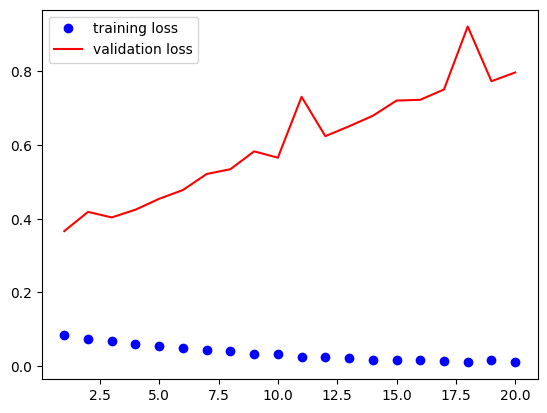

In [71]:
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.legend()
plt.show()